<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Train" data-toc-modified-id="Train-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Train</a></span></li><li><span><a href="#Test" data-toc-modified-id="Test-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Test</a></span></li><li><span><a href="#Full" data-toc-modified-id="Full-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Full</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-концентрацию-металлов:" data-toc-modified-id="Изучим-концентрацию-металлов:-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучим концентрацию металлов:</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-сырья" data-toc-modified-id="Сравним-распределения-размеров-гранул-сырья-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравним распределения размеров гранул сырья</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-всех-веществ" data-toc-modified-id="Исследуем-суммарную-концентрацию-всех-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуем суммарную концентрацию всех веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE:" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE:</a></span></li><li><span><a href="#Обучение-моделей:" data-toc-modified-id="Обучение-моделей:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей:</a></span></li><li><span><a href="#Проверка-модели-на-тестовой-выборке:" data-toc-modified-id="Проверка-модели-на-тестовой-выборке:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Проверка модели на тестовой выборке:</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовим прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используем данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
RAND = 42

### Train

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [5]:
train.isna().sum().sort_values(ascending=False).head(20)

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
final.output.tail_pb                         100
rougher.input.feed_pb                        100
primary_cleaner.input.xanthate               100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
rougher.input.floatbank10_sulfate             29
rougher.output.concentrate_sol                22
secondary_cleaner.state.floatbank2_b_air      21
primary_cleaner.input.sulfate                 20
primary_cleaner.output.tail_pb                15
dtype: int64

В выборке train наблюдается значительное число пропусков в признаках:  
`secondary_cleaner.output.tail_sol`, `rougher.state.floatbank10_e_air`, `rougher.input.floatbank11_xanthate`

In [6]:
train.duplicated().sum()

0

Дубликаты не обнаружены.

### Test

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

In [8]:
test.isna().sum().sort_values(ascending=False).head(15)

rougher.input.floatbank11_xanthate            25
rougher.input.feed_sol                        21
secondary_cleaner.state.floatbank3_a_air       9
rougher.input.floatbank11_sulfate              8
primary_cleaner.input.depressant               5
rougher.input.floatbank10_sulfate              5
primary_cleaner.input.sulfate                  4
primary_cleaner.input.xanthate                 4
secondary_cleaner.state.floatbank2_a_air       3
rougher.input.feed_rate                        3
secondary_cleaner.state.floatbank2_b_air       2
rougher.input.feed_size                        1
secondary_cleaner.state.floatbank6_a_level     0
rougher.input.floatbank10_xanthate             0
rougher.input.feed_au                          0
dtype: int64

В выборке `test` пропусков значительно меньше, но не хватает 34 столбцов-признаков.

In [9]:
test.duplicated().sum()

0

### Full

In [10]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [11]:
full.isna().sum().sort_values(ascending=False).head(20)

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
rougher.input.feed_pb                        100
rougher.input.feed_sol                        99
primary_cleaner.output.tail_sol               62
rougher.input.floatbank11_sulfate             44
primary_cleaner.input.depressant              37
rougher.input.floatbank10_sulfate             34
primary_cleaner.input.sulfate                 24
secondary_cleaner.state.floatbank2_b_air      23
rougher.output.concentrate_sol                23
primary_cleaner.output.tail_pb                21
dtype: int64

Основная часть пропусков лежит в `train`.

In [12]:
full.duplicated().sum()

0

Явных дубликатов нет.

**Признаки, которых нет в `test`, но есть в `full`:**

In [13]:
target_cols = [col for col in full.columns if col not in test.columns]
target_cols

['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

Эти признаки являются целевыми: в них хранятся содержания различных химических элементов на выходе с каждого этапа обработки золота (причем как в черновом концентрате, так и в отвальных хвостах).  
А также значения эффективности обогащения как после флотации, так и после заключетельного этапа очистки. 

Посмотрим, есть ли явная связь лидирующего по пропускам признака с остальными:

In [14]:
pd.set_option('display.max_columns', None)
#pd.reset_option('max_columns')
full[ full['secondary_cleaner.output.tail_sol'].isna()].head(10)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
1616,2016-04-01 08:00:00,9.943401,7.542210,NaN,43.050052,5.982863,11.186132,1.037645,4.265981,2.877984,24.991930,3.036741,5.73,0.315188,6.592289,5.321763,9.355665,31.969794,17.217789,2.844502,1.689113,4.552381,1599.794125,-400.268817,1602.082199,-399.219507,1594.763405,-400.379657,886.455766,-399.807225,229457.583264,8798.170504,8797.683195,-0.000437,7.480951,NaN,176.819859,55.244951,NaN,3.048159,3.996756,2.495699,3.994954,2.497911,8.735538,7.033525,9.011418,16.534931,40.926351,4.131907,0.862082,12.227496,1.947598,1000.680318,-499.638552,1599.466198,-500.336605,1599.997266,-500.942177,1590.452607,-501.285175,1399.846688,-502.418868,1300.314943,-499.924685,15.059629,4.557117,NaN,3.795325,30.012126,-499.046895,28.059696,-499.131792,2.705083e+01,-500.250576,2.499299e+01,-501.234077,12.033748,-503.870685,11.956217,-501.172007,12.137367,-499.381630,10.019826,-499.559743,19.983178,-500.131499
1617,2016-04-01 09:00:00,8.254964,7.972211,NaN,43.818753,15.662743,11.107211,1.131023,5.198314,2.993891,28.645445,3.044481,5.73,0.395143,0.418586,NaN,NaN,2.871962,17.262284

Видно, что есть со столбцом `primary_cleaner.output.concentrate_sol`

In [15]:
pd.reset_option('max_columns')

full[ full['secondary_cleaner.output.tail_sol'].isna() &
    full['primary_cleaner.output.concentrate_sol'].isna()].shape[0]

153

То есть имеется существенная доля случаев, когда содержание материала sol неизвестно ни в черновом концентрате, ни в хвостах.  

Так как у нас данные в некотором смысле зависят от даты и времени, когда проводилась обработка, то заполним оставшиеся значения предыдущими и последующими значениями (на 20 часов с прошлого значения и на на 20 часов назад со следующего):

In [16]:
full = full.fillna(method='ffill', limit=20)
full = full.fillna(method='bfill', limit=20)

train = train.fillna(full)
test = test.fillna(full)

Число пропусков заметно сократилось:

In [17]:
full.isna().sum().sort_values(ascending=False).head(7)

secondary_cleaner.output.tail_sol           249
rougher.state.floatbank10_e_air             245
rougher.input.floatbank11_xanthate          230
secondary_cleaner.state.floatbank2_a_air     59
rougher.input.feed_size                      31
rougher.input.feed_sol                        0
primary_cleaner.state.floatbank8_a_air        0
dtype: int64

In [18]:
train.isna().sum().sort_values(ascending=False).head(7)

rougher.input.feed_size                          31
rougher.input.floatbank11_xanthate               22
secondary_cleaner.output.tail_sol                 2
rougher.calculation.sulfate_to_au_concentrate     0
primary_cleaner.state.floatbank8_a_level          0
primary_cleaner.state.floatbank8_b_air            0
primary_cleaner.state.floatbank8_b_level          0
dtype: int64

In [19]:
test.isna().sum().sort_values(ascending=False).head(7)

secondary_cleaner.state.floatbank6_a_level    0
rougher.state.floatbank10_b_air               0
rougher.state.floatbank10_a_air               0
rougher.input.floatbank11_xanthate            0
rougher.input.floatbank11_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank10_sulfate             0
dtype: int64

Остальные значения заполним медианными значениями (их осталось не так много, сильного влияния это не должно оказать на модель):

In [20]:
values = {'secondary_cleaner.output.tail_sol': full['secondary_cleaner.output.tail_sol'].median(),
          'rougher.state.floatbank10_e_air': full['rougher.state.floatbank10_e_air'].median(),
          'rougher.input.floatbank11_xanthate': full['rougher.input.floatbank11_xanthate'].median(),
          'secondary_cleaner.state.floatbank2_a_air': full['secondary_cleaner.state.floatbank2_a_air'].median(),
          'rougher.input.feed_size': full['rougher.input.feed_size'].median()}

full = full.fillna(value=values)

In [21]:
train = train.fillna(full)
test = test.fillna(full)

Пропуски преобразованы.

In [22]:
(full.isna().sum().value_counts() - full.shape[1],
 train.isna().sum().value_counts() - train.shape[1],
 test.isna().sum().value_counts() - test.shape[1])

(0    0
 dtype: int64,
 0    0
 dtype: int64,
 0    0
 dtype: int64)

**Исследуем корректность подсчета эффективности обогащения на тренировочных данных:**

In [23]:
train['rougher.output.recovery'].sample(7, random_state=RAND)

12057    83.148963
9161     84.092866
4069     60.396106
9379     80.685864
6498     83.747916
9393     85.968845
7654     70.474223
Name: rougher.output.recovery, dtype: float64

Эффективность подсчитана в процентах. **Напишем функцию для подсчета эффективности:**

На этапе флотации:

In [24]:
def recovery1(row):
    c = row['rougher.output.concentrate_au'] # доля золота в концентрате после флотации;
    f = row['rougher.input.feed_au']   # доля золота в сырье до флотации;
    t = row['rougher.output.tail_au']  # доля золота в отвальных хвостах после флотации
    return (c * (f - t)) / (f * (c - t)) * 100

In [25]:
recovery_res1 = train.apply(recovery1, axis=1)

Посмотрим по метрике MAE насколько подсчитанные результаты отклоняются от результатов в тестовых данных:

In [26]:
mae(recovery_res1, train['rougher.output.recovery'])

9.682896147825551e-15

Получили почти нулевое отклонение в подсчете эффективности на этапе флотации

### Вывод

Данные готовы к анализу.

## Анализ данных

### Изучим концентрацию металлов:

Изучим концентрацию металлов (Au, Ag, Pb) на каждом этапе обработки (rougher, primary_cleaner, final {after secondary_cleaner}):

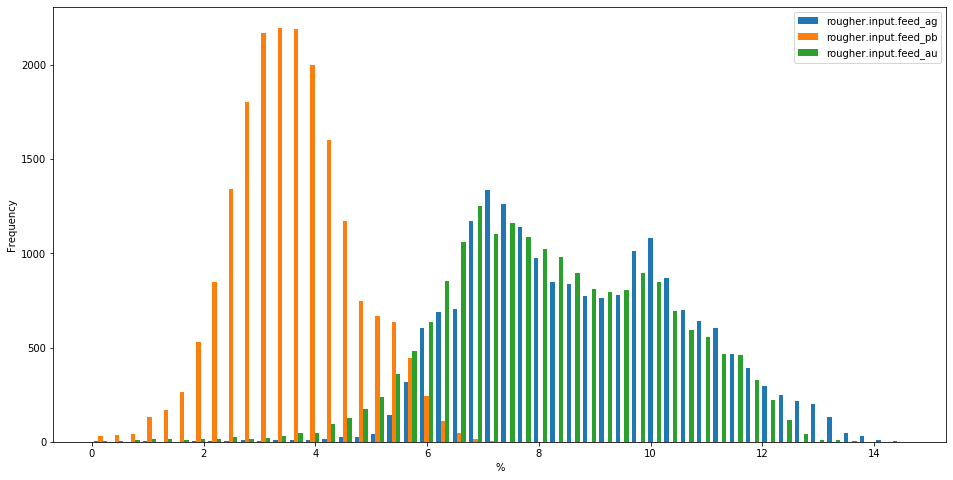

In [217]:
plt.figure(figsize=(16, 8))
plt.hist([full['rougher.input.feed_ag'],
          full['rougher.input.feed_pb'],
          full['rougher.input.feed_au']],
         bins=50,
         label=['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_au'])
plt.legend(loc='upper right')
plt.xlabel('%')
plt.ylabel('Frequency')
plt.show()

У исходного сырья содержание золота и серебра примерно совпадает, при этом свинца значительно меньше.

Рассмотрим содержание металлов после флотации:

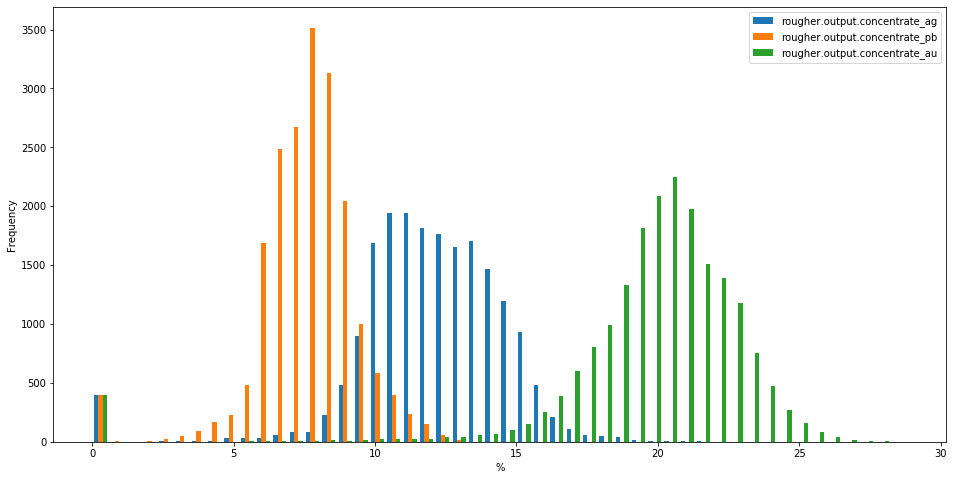

In [218]:
plt.figure(figsize=(16, 8))
plt.hist([full['rougher.output.concentrate_ag'],
          full['rougher.output.concentrate_pb'],
          full['rougher.output.concentrate_au']],
         bins=50,
         label=['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au'])
plt.legend(loc='upper right')
plt.xlabel('%')
plt.ylabel('Frequency')
plt.show()

Распределения нормальные с небольной скошенностью вправо.  
Наибольшее содержание металла на этапе флотации у золота,наименьшее - у свинца.  
Также появились значения с нулевым содержанием (выбросы).

После первой очистки:

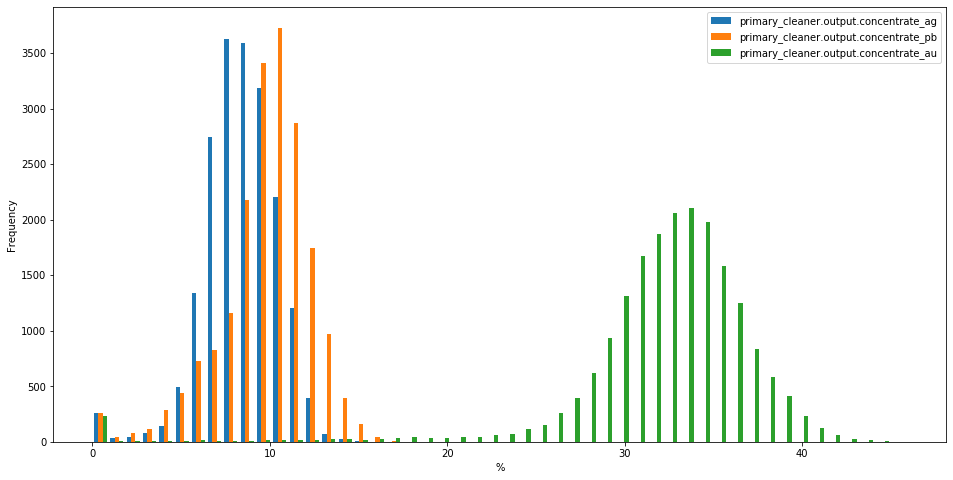

In [219]:
plt.figure(figsize=(16, 8))
plt.hist([full['primary_cleaner.output.concentrate_ag'],
          full['primary_cleaner.output.concentrate_pb'],
          full['primary_cleaner.output.concentrate_au']],
         bins=50,
         label=['primary_cleaner.output.concentrate_ag',
                'primary_cleaner.output.concentrate_pb',
                'primary_cleaner.output.concentrate_au'])
plt.legend(loc='upper right')
plt.xlabel('%')
plt.ylabel('Frequency')
plt.show()

После первой очистки сильно видно, как золота становится сильно больше, чем серебра и свинца.

И на заключительном этапе:

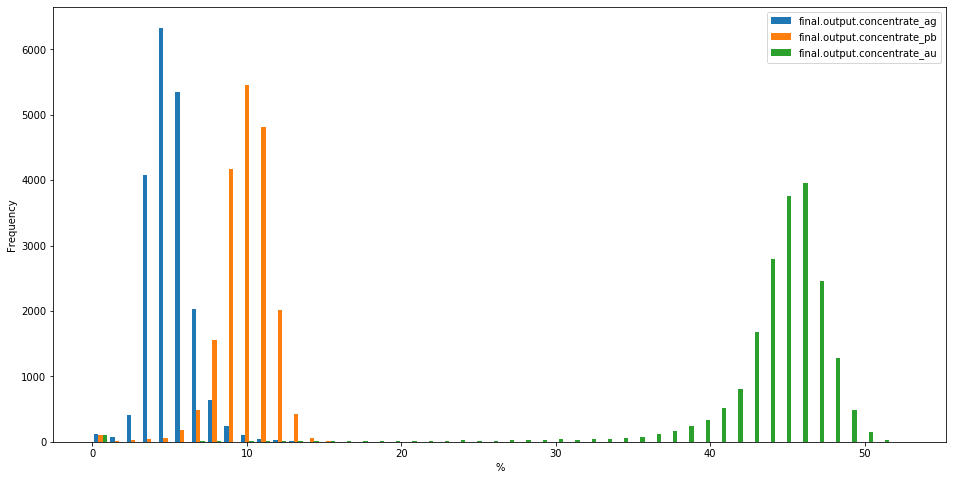

In [220]:
plt.figure(figsize=(16, 8))
plt.hist([full['final.output.concentrate_ag'],
          full['final.output.concentrate_pb'],
          full['final.output.concentrate_au']],
         bins=50,
         label=['final.output.concentrate_ag',
                'final.output.concentrate_pb',
                'final.output.concentrate_au'])
plt.legend(loc='upper right')
plt.xlabel('%')
plt.ylabel('Frequency')
plt.show()

После заключительного этапа очистки содержание золота в среднем поднялось с 35% до 45% (относительно первого этапа очистки).  
Относительно изначального сырья содержание золота повысилось в среднем в 5 раз.

### Сравним распределения размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.  
Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

**Распределения размеров гранул сырья до флотации:**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


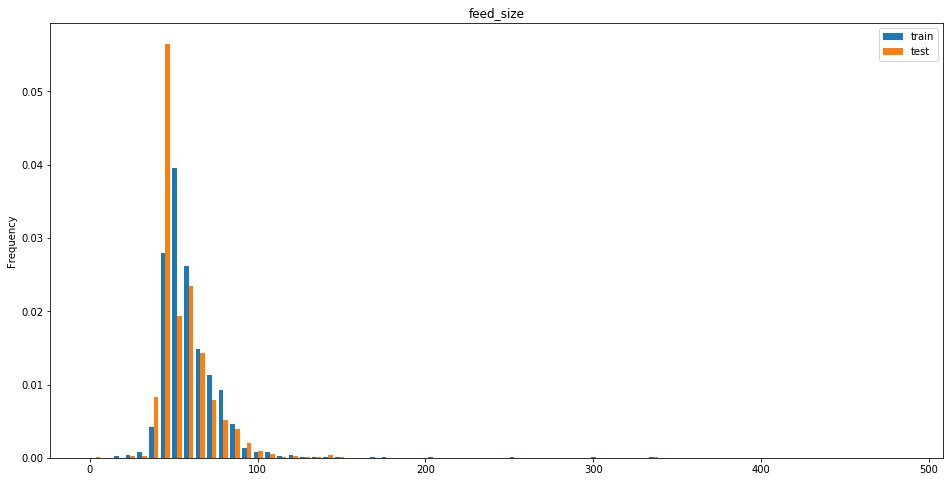

In [221]:
plt.figure(figsize=(16, 8))
plt.hist([train['rougher.input.feed_size'],
          test['rougher.input.feed_size']],
         bins=70,
         label=['train', 'test'],
        density=True) #игнорируем то, что выборки разных размеров и смотрим на чистое распределение.
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.title('feed_size')
plt.show()

Распределения похожи, отличаются домножением на коэффициент относительно частоты (если учитывать размеры выборок).

**Распределения размеров гранул сырья чернового концентрата:**

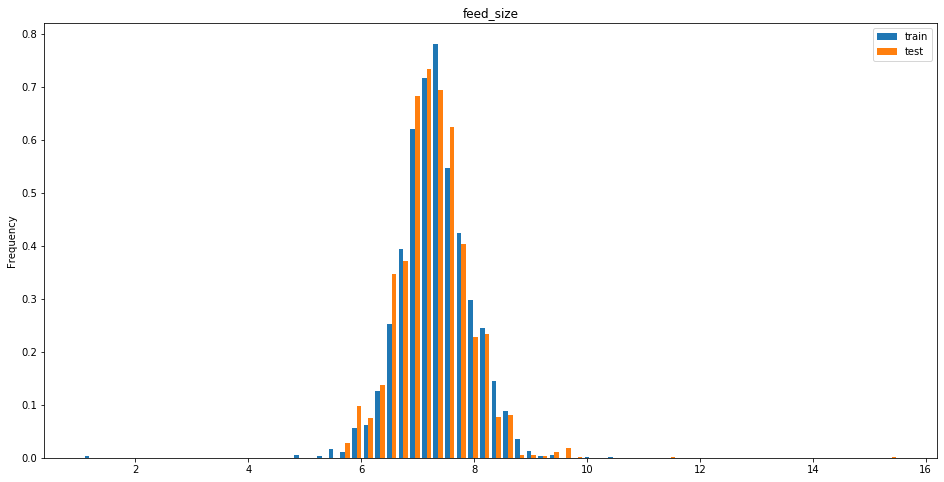

In [222]:
plt.figure(figsize=(16, 8))
plt.hist([train['primary_cleaner.input.feed_size'],
          test['primary_cleaner.input.feed_size']],
         bins=70,
         label=['train',
                'test'], density=True) #density=True - переход от количества к доле
plt.legend(loc='upper right')
plt.ylabel('Frequency')
plt.title('feed_size')
plt.show()

Распределения выровнялись до нормальных распределений, смещение уменьшилось, стало еще более явно видно, что данные отличаются лишь размерами.

### Исследуем суммарную концентрацию всех веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [223]:
rougher_input_sum = full[['rougher.input.feed_ag', 
      'rougher.input.feed_pb', 
      #'rougher.input.feed_sol', 
      'rougher.input.feed_au']].sum(axis=1)

rougher_output_sum = full[['rougher.output.concentrate_ag', 
      'rougher.output.concentrate_pb', 
      #'rougher.output.concentrate_sol', 
      'rougher.output.concentrate_au']].sum(axis=1)

primary_cleaner_output_sum = full[['primary_cleaner.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_pb', 
      #'primary_cleaner.output.concentrate_sol', 
      'primary_cleaner.output.concentrate_au']].sum(axis=1)

final_output_sum = full[['final.output.concentrate_ag', 
      'final.output.concentrate_pb', 
      #'final.output.concentrate_sol', 
      'final.output.concentrate_au']].sum(axis=1)

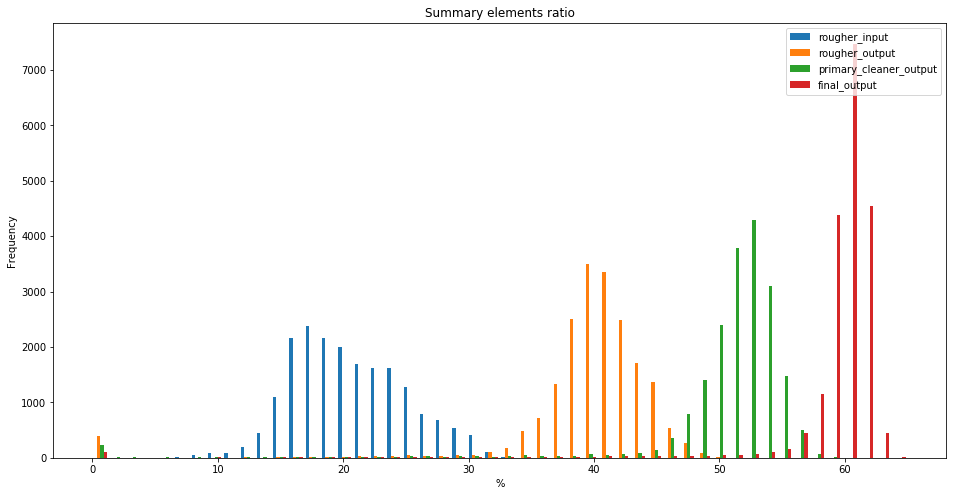

In [224]:
plt.figure(figsize=(16, 8))
plt.hist([rougher_input_sum,
         rougher_output_sum,
         primary_cleaner_output_sum,
         final_output_sum],
         bins=50,
         label=['rougher_input',
                'rougher_output',
                'primary_cleaner_output',
                'final_output'])
plt.legend(loc='upper right')
plt.xlabel('%')
plt.ylabel('Frequency')
plt.title('Summary elements ratio')
plt.show()

Без учета элемента 'sol', можно сделать вывод, что концентрация трех веществ (золота, серебра и свинца) на каждом этапе в среднем растет. Причем, после флотации - на 20%, на остальных этапах очистки примерно по 10%.

Удалим аномалии около нуля:

In [225]:
full = full[ full[['rougher.output.concentrate_ag', 
      'rougher.output.concentrate_pb', 
      #'rougher.output.concentrate_sol', 
      'rougher.output.concentrate_au']].sum(axis=1) > 5]

full = full[ full[['primary_cleaner.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_pb', 
      #'primary_cleaner.output.concentrate_sol', 
      'primary_cleaner.output.concentrate_au']].sum(axis=1) > 5]

full = full[ full[['final.output.concentrate_ag', 
      'final.output.concentrate_pb', 
      #'final.output.concentrate_sol', 
      'final.output.concentrate_au']].sum(axis=1) > 5]


In [226]:
train = train[ train[['rougher.output.concentrate_ag', 
      'rougher.output.concentrate_pb', 
      #'rougher.output.concentrate_sol', 
      'rougher.output.concentrate_au']].sum(axis=1) > 5]

train = train[ train[['primary_cleaner.output.concentrate_ag', 
      'primary_cleaner.output.concentrate_pb', 
      #'primary_cleaner.output.concentrate_sol', 
      'primary_cleaner.output.concentrate_au']].sum(axis=1) > 5]

train = train[ train[['final.output.concentrate_ag', 
      'final.output.concentrate_pb', 
      #'final.output.concentrate_sol', 
      'final.output.concentrate_au']].sum(axis=1) > 5]

## Модель

### Функция для вычисления итоговой sMAPE:

In [227]:
def total_sMAPE(rougher_sMAPE, final_sMAPE):
    return 0.25 * rougher_sMAPE + 0.75 * final_sMAPE

In [228]:
def sMAPE(target, preds):
    '''sMAPE (англ. Symmetric Mean Absolute Percentage Error,
    «симметричное среднее абсолютное процентное отклонение»).
    Она одинаково учитывает масштаб и целевого признака, и предсказания.'''
    target = pd.DataFrame(target)
    preds = pd.DataFrame(preds)
    return ((target - preds).abs() / (target.abs() + preds.abs()) ).mean() * 2 * 100
    
     
    '''
    sum = 0
    for i in range(len(target)):
        sum += abs(target[i] - preds[i]) / (abs(target[i]) + abs(preds[i]))
    return 2 * sum * 100 / len(target)'''
        

Проверка:

In [229]:
sMAPE(pd.DataFrame([1, 2, 3]),
      pd.DataFrame([3, 6, 9]))

0    100.0
dtype: float64

### Обучение моделей:

In [230]:
# разобьем тренировочные данные на признаки и целевые признаки
features = train.drop(target_cols, axis=1)
target = train[['rougher.output.recovery', 'final.output.recovery']]

features.shape, target.shape

((13580, 53), (13580, 2))

**Масштабирование признаков:**

Запомним дату из тестовой выборки:

In [231]:
test_date = test['date']
test_date.head()

0    2016-09-01 00:59:59
1    2016-09-01 01:59:59
2    2016-09-01 02:59:59
3    2016-09-01 03:59:59
4    2016-09-01 04:59:59
Name: date, dtype: object

Нормализация даты:

In [232]:
train['date'] = pd.to_datetime(train['date'])
features['date'] = pd.to_datetime(features['date'])
test['date'] = pd.to_datetime(test['date'])

In [233]:
#отключаем предупреждение
pd.options.mode.chained_assignment = None

values = features['date'].values
values = values.reshape((len(values), 1)) # было 0 столбцов и много строк, добавляем 1 столбец, сохраняя данные

test_values = test['date'].values
test_values = test_values.reshape((len(test_values), 1)) # аналогично, делается это для того, что на вход нужно подавать матрицу

scaler = MinMaxScaler(feature_range=(0, 10))
scaler.fit(values)
features['date'] = scaler.transform(values)
test['date'] = scaler.transform(test_values)

Стандартизация остальных числовых признаков:

In [234]:
scaler = StandardScaler()
scaler.fit(features.iloc[:, 1:])
features.iloc[:, 1:] = scaler.transform(features.iloc[:, 1:])
test.iloc[:, 1:] = scaler.transform(test.iloc[:, 1:])

*Признаки отмасштабированы.*

In [235]:
features.index, target['rougher.output.recovery'].index

(Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             14139, 14140, 14141, 14142, 14143, 14144, 14145, 14146, 14147,
             14148],
            dtype='int64', length=13580),
 Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                 9,
             ...
             14139, 14140, 14141, 14142, 14143, 14144, 14145, 14146, 14147,
             14148],
            dtype='int64', length=13580))

In [254]:
def cross_val(model, features, target, cv=5):
    sample_size = int(len(features)/cv)
    scores = []
    for i in range(0, len(features)-sample_size, sample_size):
        valid_indexes = list(range(i, i + sample_size)) # запишем массив из индексов для валидационного блока 
        train_indexes = list(range(0, i)) + list(range(i + sample_size, len(features) - sample_size))
        #[i for i in range(0, len(features)) if i not in valid_indexes] # запишем массив из индексов для обучающей выборки

        # разобьем переменные features и target
        features_train = features.iloc[train_indexes, :]
        target_train = target.iloc[train_indexes]
        features_valid = features.iloc[valid_indexes, :]
        target_valid = target.iloc[valid_indexes]

        #model = LinearRegression()
        model = model.fit(features_train, target_train)
        preds = pd.Series(model.predict(features_valid))
        target_valid = target_valid.reset_index(drop=True)
        score = sMAPE(preds, target_valid)
        scores.append(score)
    final_score = sum(scores) / len(scores)
    return final_score

#на модельке выдает nan

Та же функция, только с использованием KFold:

In [255]:
def cross_val(model, X, y, cv=5):
    kf = KFold(n_splits=cv, shuffle=False, random_state=RAND)
    scores = []
    X = np.array(X)
    y = np.array(y)
    for train_index, valid_index in kf.split(X):    #Generate indices to split data into training and test set.
        print("TRAIN:", train_index, "VALID:", valid_index)
        X_train, X_valid = X[train_index, :], X[valid_index, :]
        y_train, y_valid = y[train_index], y[valid_index]
        
        #model = LinearRegression()
        model = model.fit(X_train, y_train)
        preds = pd.Series(model.predict(X_valid))
        score = sMAPE(preds, y_valid)
        scores.append(score)
    final_score = sum(scores) / len(scores)
    return final_score

**Для таргета `rougher.output.recovery`:**

Линейная регрессия:

In [256]:
model = LinearRegression()

rougher_score = cross_val(model, features, target['rougher.output.recovery'], cv=3)
rougher_score[0]

TRAIN: [ 4527  4528  4529 ... 13577 13578 13579] VALID: [   0    1    2 ... 4524 4525 4526]
TRAIN: [    0     1     2 ... 13577 13578 13579] VALID: [4527 4528 4529 ... 9051 9052 9053]
TRAIN: [   0    1    2 ... 9051 9052 9053] VALID: [ 9054  9055  9056 ... 13577 13578 13579]


6.736841634983314

In [239]:
model_lin1 = LinearRegression()
score = make_scorer(sMAPE)

#указываем таргет в np.array, иначе ломается
scores = cross_val_score(model_lin1, features, target['rougher.output.recovery'].values, scoring=score, cv=5)
rougher_score = scores.mean()
rougher_score

5.9089267393207034

Случайный лес:

In [ ]:
%%time
scorer = make_scorer(sMAPE)

#hyper parameter tuning. Selecting best depth
depths = [x for x in range(1, 20)]
# empty list that will hold cv scores
cv_scores = []
for depth in depths:
    model1 = RandomForestRegressor(max_depth=depth, n_estimators=10, random_state=RAND)
    scores = cross_val_score(model1, features, target['rougher.output.recovery'].values, scoring=scorer, cv=5) #указываем таргет в np.array, иначе ломается
    cv_scores.append(scores.mean())

#graphical view

optimal_depth_index = cv_scores.index(min(cv_scores))
optimal_depth = depths[optimal_depth_index]
print('optimal_depth', optimal_depth)
print('best_cv_score', min(cv_scores))
model1 = RandomForestRegressor(max_depth=optimal_depth, n_estimators=10, random_state=RAND) 

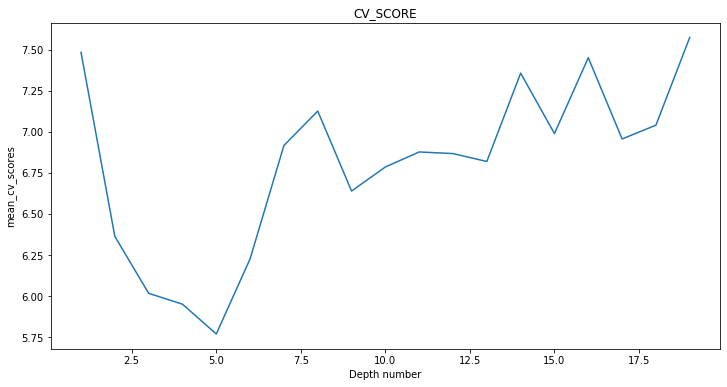

In [241]:
rougher_score = min(cv_scores)      

plt.figure(figsize=(12, 6))
plt.title('CV_SCORE')
plt.plot(depths, cv_scores)
plt.xlabel('Depth number')
plt.ylabel('mean_cv_scores')
plt.show()

**Для таргета `final.output.recovery`:**

Линейная регрессия:

In [242]:
model = LinearRegression()
score = make_scorer(sMAPE)

#указываем таргет в np.array, иначе ломается
scores = cross_val_score(model, features, target['final.output.recovery'].values, scoring=score, cv=5)
final_score = scores.mean()
final_score

9.971039967986915

Случайный лес:

In [63]:
%%time
scorer = make_scorer(sMAPE)

#hyper parameter tuning. Selecting best depth
depths = [x for x in range(1, 20)]
# empty list that will hold cv scores
cv_scores2 = []
for depth in depths:
    model2 = RandomForestRegressor(max_depth=depth, n_estimators=10, random_state=RAND)
    scores = cross_val_score(model2, features, target['final.output.recovery'].values, scoring=scorer, cv=5) #указываем таргет в np.array, иначе ломается
    cv_scores2.append(scores.mean())

#graphical view

optimal_depth_index = cv_scores2.index(min(cv_scores2))
optimal_depth2 = depths[optimal_depth_index]
print('optimal_depth', optimal_depth2)
print('best_cv_score', min(cv_scores2))
model2 = RandomForestRegressor(max_depth=optimal_depth2, n_estimators=10, random_state=RAND) 

optimal_depth 4
best_cv_score 8.68457374534666
CPU times: user 4min 44s, sys: 180 ms, total: 4min 44s
Wall time: 4min 49s


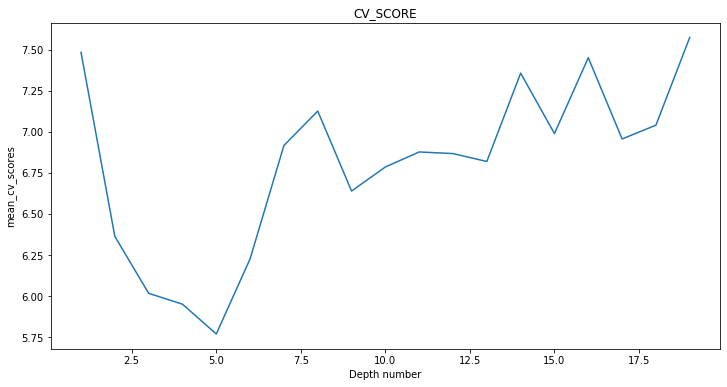

In [243]:
final_score = min(cv_scores2)      

plt.figure(figsize=(12, 6))
plt.title('CV_SCORE')
plt.plot(depths, cv_scores)
plt.xlabel('Depth number')
plt.ylabel('mean_cv_scores')
plt.show()

**Итоговое sMAPE:**

In [244]:
total_sMAPE(rougher_score, final_score)

7.955689433967726

### Проверка модели на тестовой выборке:

Получаем данные для даты из тестовой выборки в full:

In [257]:
full.loc[ full['date'].isin(test_date), 'rougher.output.recovery'].values

array([89.99342112, 88.0896569 , 88.41275562, ..., 93.01813839,
       92.59904222, 91.1776948 ])

In [245]:
full.set_index('date').loc[test_date, 'rougher.output.recovery'].values

array([89.99342112, 88.0896569 , 88.41275562, ..., 93.01813839,
       92.59904222, 91.1776948 ])

**Проверка моделей:**

In [248]:
model1.fit(features, target['rougher.output.recovery'])
test_date

rougher_test_score = sMAPE(
    full.set_index('date').loc[test_date, 'rougher.output.recovery'].values, #сопоставление даты из тестовой выборки с датой в full
    model1.predict(test)
)
rougher_test_score[0]

4.056072551002464

In [250]:
model2.fit(features, target['final.output.recovery'])
test_date

final_test_score = sMAPE(
    full.set_index('date').loc[test_date, 'final.output.recovery'].values,
    model2.predict(test)
)
final_test_score[0]

8.350083918683584

In [251]:
total_sMAPE(rougher_test_score[0], final_test_score[0])

8.234721425713378

## Вывод

Получилось предсказать эффективность обогащения чернового концентрата и эффективность обогащения финального концентрата, используя две модели RandomForestRegressor с разными гиперпараметрами, причем финальная ошибка sMAPE получилась 8%.

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке